Notas:
--------
Estoy ajustando el grafico KG, para guardarlo en un pdf con todos los graficos correspondientes al canal tradicional

__Revisar resultados:__

__Construir Relación (Precio/ Cantidad):__
- [ ] Cluster
- [ ] Segmento.1
- [ ] Categoría Cliente
- [ ] Año Creación
- [ ] Material Favorito
- [ ] Frecuencia Historica

__Passos siguientes:__
- Revisar el latex, para entender que pasos seguir
- Modelo de regresión que muestra la dispesión del precio respecto al volumen


In [ ]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

# Inicio
__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [7]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio
"""
file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'


#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [9]:
#from adjustText import adjust_text
# from adjustText import *

In [10]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [11]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [12]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [13]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [14]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [ ]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

##### Abrir Archivo  

In [15]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


`DF_FULL.to_csv('file_name.csv', encoding='utf-8',index=True)`

#### Funcion

In [ ]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [ ]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'
            #,'Centro.1':'Centro'
            })
data['Centro_cod']=data['Centro']
data['Centro']=data['Centro.1']

data[data.Año>=int(Año_inicio)]
data.dtypes

In [ ]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

# Selección data(Canal/material)
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

##### Definición del producto 

In [ ]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
print(i_producto
     ,Tipo_de_Cliente)

data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


### Columnas a usar 
rename aplicado a `Precio promedio`

###### Columnas a usar 

In [ ]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la Centro:
'Centro', #'Centro', Centro de distribución de los productos
    #ID Centro, Nombre Centro(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]


###### Ajuste de type de columnas 

In [ ]:
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [ ]:
#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head(2)

##### brebe analisis 

###### Diferencias en filas y columnas, data base 

In [ ]:
#======================================
# Disminución de las filas y columnas
# al pasar a data_i
#======================================

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

###### Describe 

In [ ]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

## Dicionario 
rename aplicado a `Precio promedio`

In [ ]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
        }

##### Revision

In [ ]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))
print((list_))


In [ ]:
print(Dic_col.keys())
Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]
print(Columnas_a_usar,len(Columnas_a_usar))
data[Columnas_a_usar].head(2)


In [ ]:
for i in list(list_+['Tipo de cliente']):
    print(i,data[list_+['Tipo de cliente']].iloc[:1,:][i].to_list())

# Cantidad de clientes por cada cat 

In [24]:
print(
Dic_col['Ubicacion'])
print(
Dic_col['Cliente Categoria'])
print(
Dic_col['Cliente Atributos'])

['Centro', 'Población']
['Cluster', 'Segmento.1', 'Categoría Cliente']
['Año Creación', 'Material Favorito', 'Frecuencia Historica']


## Función

##### función 

In [332]:
def Tort_Cat(df, X_G='Centro', Color_G='Centro'):
    print(X_G,Color_G)
    if(X_G==Color_G):
        print('iguales')

#         df_mean=df\
#         .groupby([X_G]).mean().reset_index()
#         print('df_mean',df_mean.shape)

        df_count_Total=df[[X_G]+['Cliente']
            ].groupby([X_G]+['Cliente']).count().reset_index().groupby([X_G]).count()\
            .reset_index().rename(columns={'Cliente':'Cantidad de Clientes'})
        df_count_Total['Porcentaje'] =\
        (
        df_count_Total['Cantidad de Clientes'].apply(
        lambda x: ((x/df_count_Total['Cantidad de Clientes'].sum())*100).round(2)
        )
        )
        
        return(df_count_Total)
    else:
        df_count_Total=df[[X_G]+['Cliente']
            ].groupby([X_G]+['Cliente']).count().reset_index().groupby([X_G]).count()\
            .reset_index().rename(columns={'Cliente':'Cantidad de Clientes'})
    
        df_count_C=df[[X_G,Color_G]+['Cliente']
            ].groupby([X_G,Color_G]+['Cliente']).count().reset_index().groupby([X_G,Color_G]).count()\
            .reset_index().rename(columns={'Cliente':'Cantidad de Clientes'})
        
        #Porcentaje
        df_count_C['Porcentaje [%]'] =\
        (
        df_count_C.apply(
        lambda x: (( x['Cantidad de Clientes']/
                   df_count_Total[(df_count_Total[X_G]==
                           x[X_G])]['Cantidad de Clientes'].to_list()[0]
                  )*100)
        ,axis=1)
        ).round(1)
        
        
#         return(df_count_Total)
        return(df_count_C)

df_X=Tort_Cat(data_i, X_G='Centro', Color_G='Población')#.head()
df_X

Centro Población


,Centro,Población,Cantidad de Clientes,Porcentaje [%]
0,Sucursal Huechuraba,Colina,106,6.8
1,Sucursal Huechuraba,Conchali,121,7.7
2,Sucursal Huechuraba,Huechuraba,80,5.1
3,Sucursal Huechuraba,Independencia,73,4.7
4,Sucursal Huechuraba,La Florida,70,4.5
...,...,...,...,...
69,Sucursal Miraflores,San Bernardo,231,11.4
70,Sucursal Miraflores,San Joaquin,26,1.3
71,Sucursal Miraflores,San Miguel,16,0.8
72,Sucursal Miraflores,San Ramon,1,0.0


## Grafico 

### Codigo Grafico Barra Categoria 

###### For Graficos 

In [345]:
G_list=list()
for i in Dic_col['Cliente Categoria']:
    X_G_P=i#'Cluster'
    Color_G_P=X_G_P#'Cluster'
    df=Tort_Cat(data_i, X_G=X_G_P, Color_G=Color_G_P)
#     df.Porcentaje=df.Porcentaje.apply(lambda x:str(x)+' %')
    G_list.append(ggplot(df
        ,
          aes(x=X_G_P,y='Cantidad de Clientes',
              fill=Color_G_P,
             label='Porcentaje'# [%]'
             )
          )\
    +geom_col()\
    +geom_text(size=13, va='bottom', format_string='{}%')
    +theme(legend_position='none'
         ,axis_text_x = element_text(angle=45,
                                       hjust=1)
           ,figure_size=(8,5)
          )
    )
# G_list[0]

Cluster Cluster
iguales
Segmento.1 Segmento.1
iguales
Categoría Cliente Categoría Cliente
iguales


###### Ploteo 

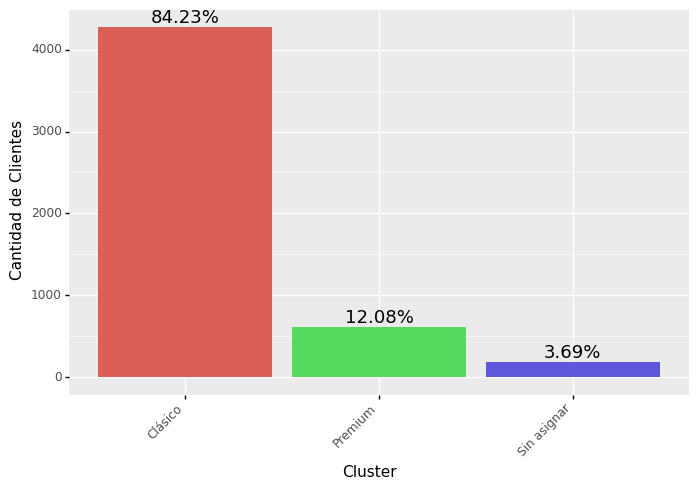

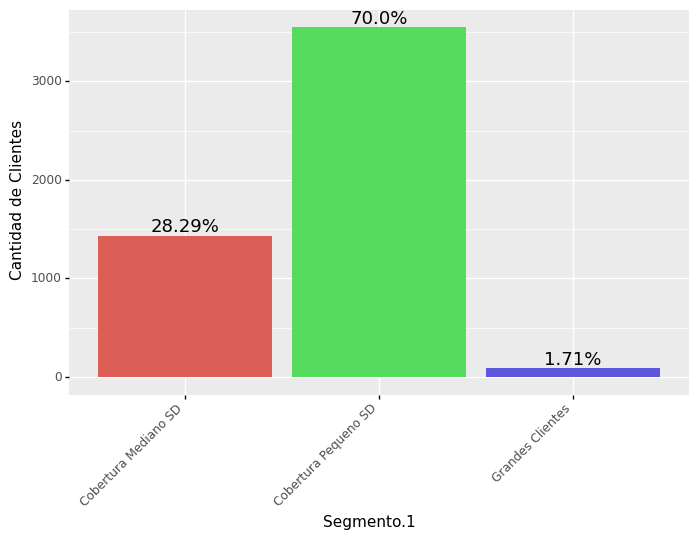

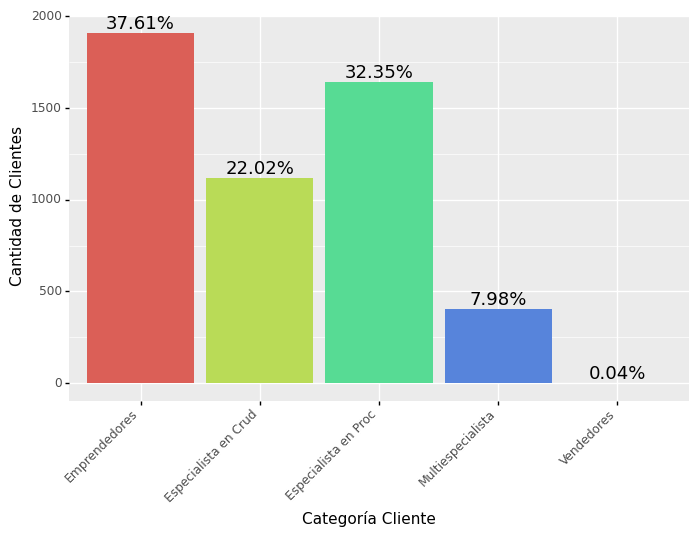

[<ggplot: (87658927568)>, <ggplot: (87658933059)>, <ggplot: (87658911949)>]

In [346]:
G_list

#### Save pdf 

##### PDF SAVE 

In [353]:
# ```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
                    G_list
                    ,Png_file_direct_Graphic_Canal_Material 
            +"\\Barras Cant Cl Caterg"+ ".pdf")
time_convert(time.time()-start_time)
# ```


C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Barras Cant Cl Caterg.pdf


Time Lapsed = 0:0:0.6185624599456787 
 H:m:s


### Torta 

In [348]:
    X_G_P=i#'Cluster'
    Color_G_P=X_G_P#'Cluster'
    df=Tort_Cat(data_i, X_G=X_G_P, Color_G=Color_G_P)

Categoría Cliente Categoría Cliente
iguales


In [347]:
df

,Categoría Cliente,Cantidad de Clientes,Porcentaje
0,Emprendedores,1908,37.61
1,Especialista en Crud,1117,22.02
2,Especialista en Proc,1641,32.35
3,Multiespecialista,405,7.98
4,Vendedores,2,0.04


In [350]:
list(df[Color_G_P].unique())

['Emprendedores',
 'Especialista en Crud',
 'Especialista en Proc',
 'Multiespecialista',
 'Vendedores']

In [351]:
# import matplotlib.pyplot as plt
manzanas=df['Porsentaje'].to_list()

nombres = list(df[Color_G_P].unique())
#['Industriales', 'Foodservice', 'Grandes Clientes', 'Tradicional']
#[DF_client['Tipo de cliente'].unique()[i-1] for i in range(len(DF_client['Tipo de cliente'].unique()),0,-1)]

colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]

desfase = (0, 0, 0, 0,0)

plt.pie(manzanas, labels=nombres, autopct="%0.1f %%",
        colors=colores[len(nombres)], explode=desfase)
plt.axis("equal")

plt.title('Clientes Totales ' +str(sum(manzanas)/1000)+'0' + ' Filtrados \n Desde el 2018', y=-0.1)

F_S=file_direct_Graphic+'\Generales\Img\\'
plt.savefig(F_S+ 'Distriubución clientes Filtrados.png')

KeyError: 'Porsentaje'

### Codigo Grafico Barra Ubicación

##### For Graficos 

###### For 

In [357]:
Dic_col['Ubicacion']

['Centro', 'Población']

In [361]:
G_list=list()
for i in Dic_col['Ubicacion']:
    X_G_P=i#'Cluster'
    Color_G_P=X_G_P#'Cluster'
    df=Tort_Cat(data_i, X_G=X_G_P, Color_G=Color_G_P)
#     df.Porcentaje=df.Porcentaje.apply(lambda x:str(x)+' %')
    G_list.append(ggplot(df
        ,
          aes(x=X_G_P,y='Cantidad de Clientes',
              fill=Color_G_P,
             label='Porcentaje'# [%]'
             )
          )\
    +geom_col()\
    +geom_text(size=13, va='bottom', format_string='{}%')
    +theme(legend_position='none'
         ,axis_text_x = element_text(angle=45,
                                       hjust=1)
           ,figure_size=(8,5)
          )
    )
# G_list[0]

Centro Centro
iguales
Población Población
iguales


###### Ploteo 

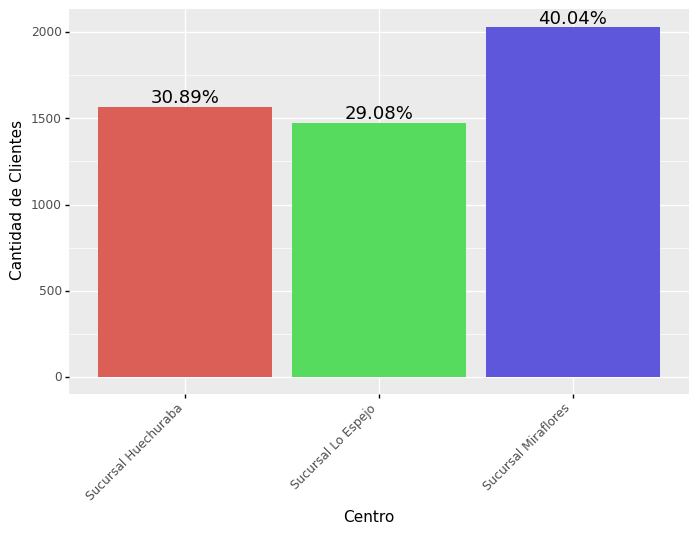

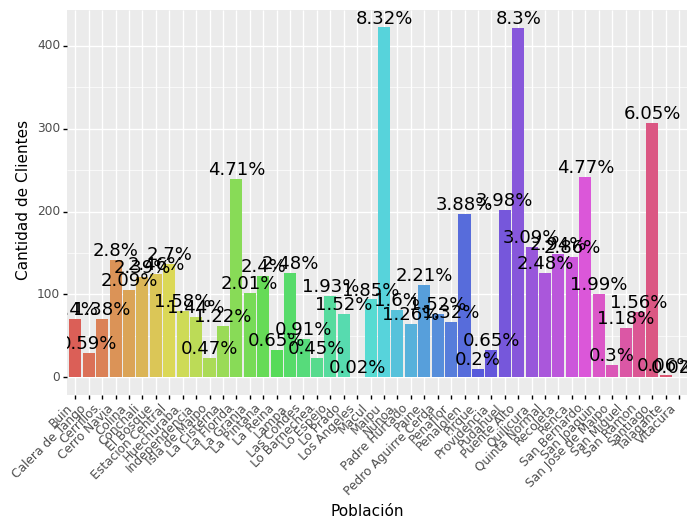

[<ggplot: (87710129842)>, <ggplot: (87710094361)>]

In [359]:
G_list

######  Poblacion

Población Población
iguales


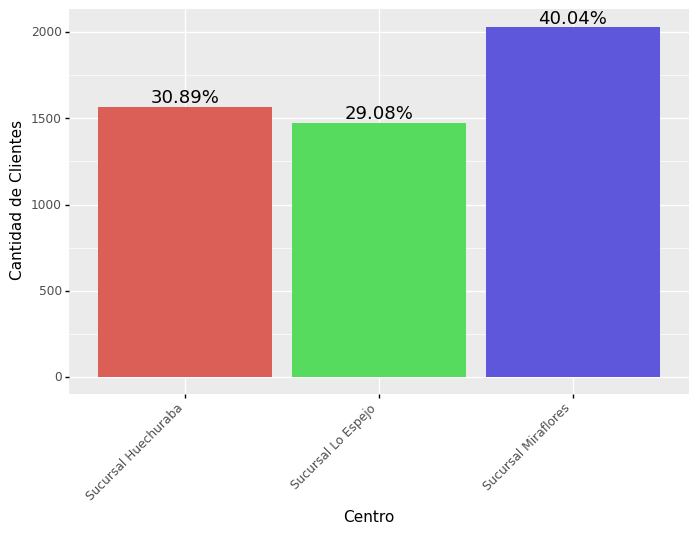

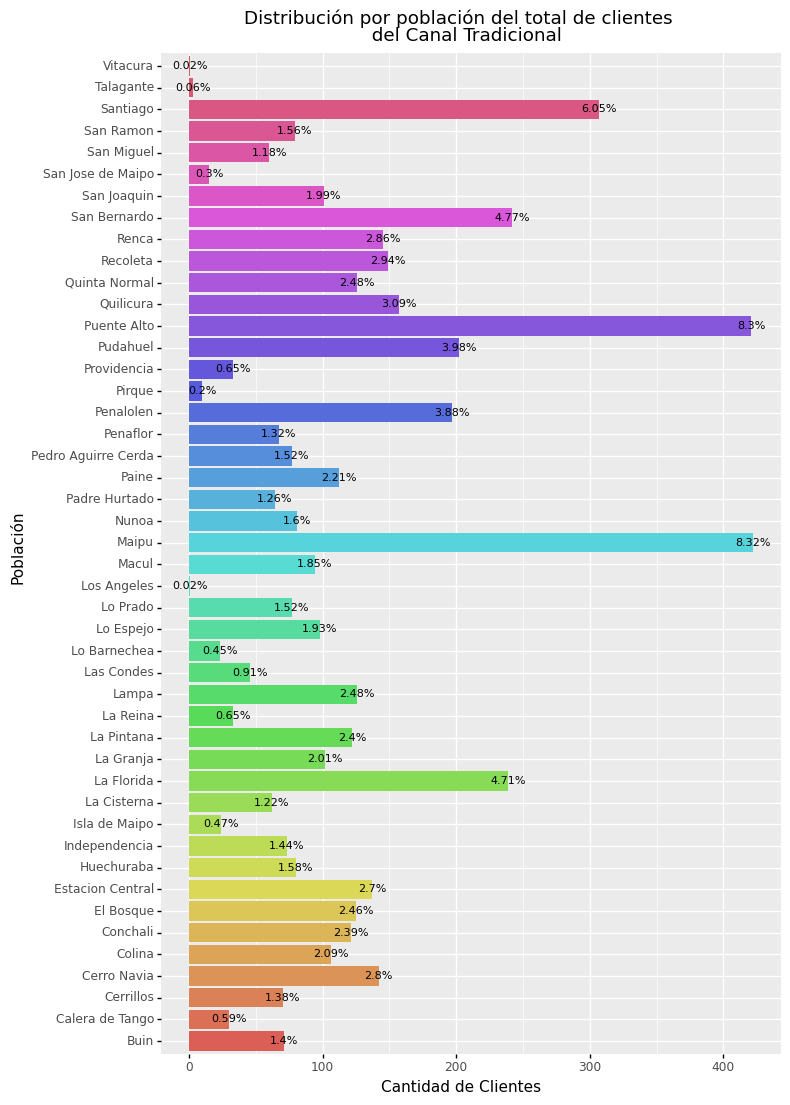

[<ggplot: (87703403352)>, <ggplot: (87707918653)>]

In [391]:
i=Dic_col['Ubicacion'][1]
X_G_P=i#'Cluster'
Color_G_P=X_G_P#'Cluster'
df=Tort_Cat(data_i, X_G=X_G_P, Color_G=Color_G_P)
#     df.Porcentaje=df.Porcentaje.apply(lambda x:str(x)+' %')
G_list[1]=(ggplot(df
    ,
      aes(x=X_G_P,y='Cantidad de Clientes',
          fill=Color_G_P,
         label='Porcentaje'# [%]'
         )
      )\
+geom_col()\
+geom_text(size=8, va='center', format_string='{}%')
+theme(legend_position='none'
#      ,axis_text_x = element_text(angle=45,hjust=1)
       ,figure_size=(8,13)
      )
+ coord_flip()
+ggtitle('Distribución por población del total de clientes \n  del Canal '+Tipo_de_Cliente )
)
G_list

###### Ploteo 

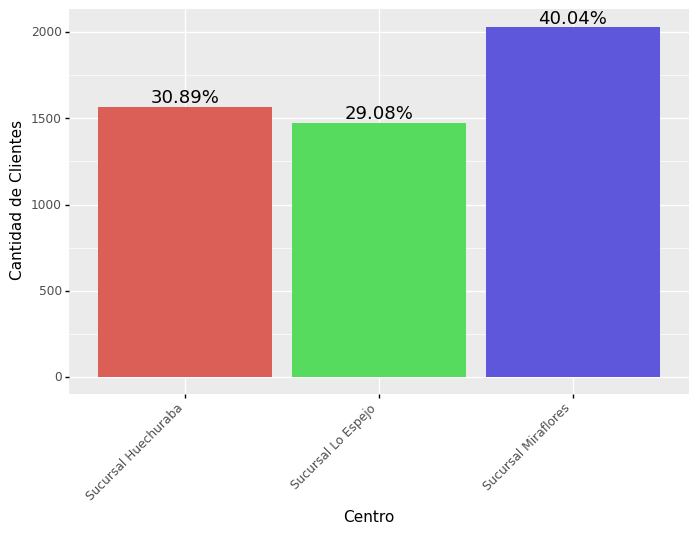

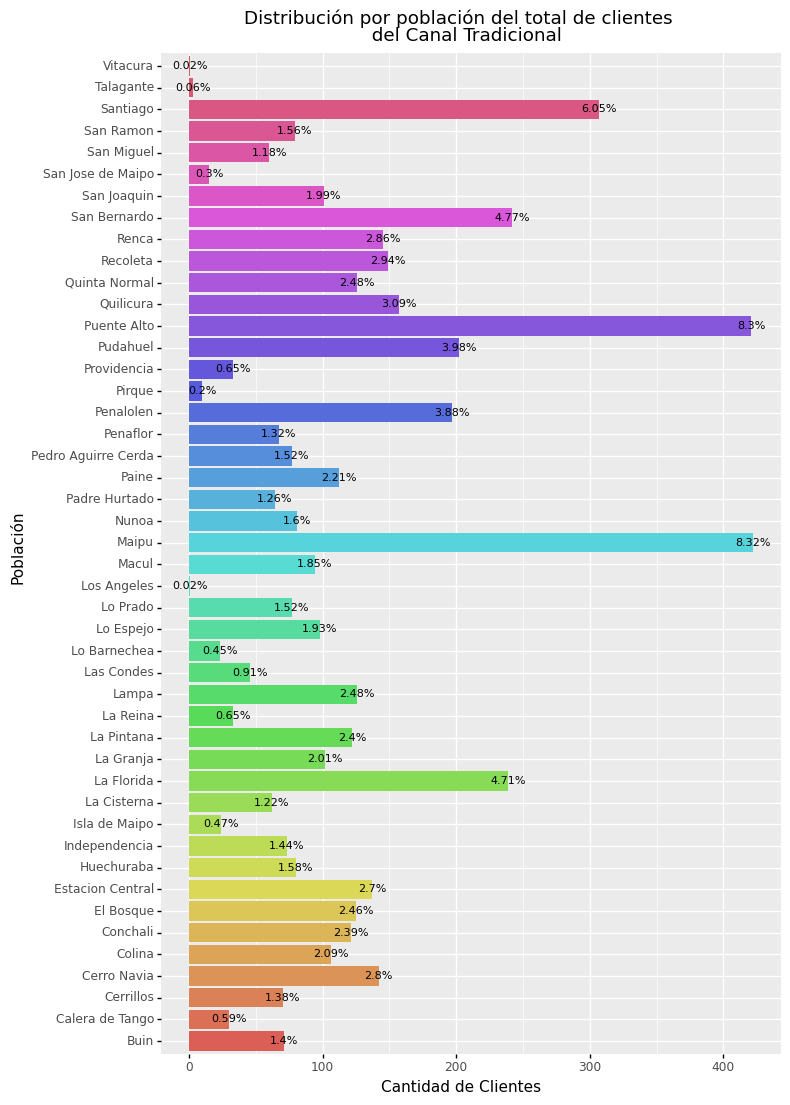

[<ggplot: (87703403352)>, <ggplot: (87707918653)>]

In [392]:
G_list

#### PNJ SAVE 

In [394]:
# ```python 
j=0
for i in ['Sucursales','Poblacion']:
    G_Lista=G_list
    file_name=('Cantidad de Clientes por Ubicación_'
               +i+'Tradic_'+Y_producto)
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\Ubicación"
    
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1
# ```

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\Cantidad de Clientes por Ubicación_SucursalesTradic_1010078
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 13 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\Cantidad de Clientes por Ubicación_PoblacionTradic_1010078


## Atributos 

In [27]:
print(
Dic_col['Ubicacion'])
print(
Dic_col['Cliente Categoria'])
print(
Dic_col['Cliente Atributos'])

['Centro', 'Población']
['Cluster', 'Segmento.1', 'Categoría Cliente']
['Año Creación', 'Material Favorito', 'Frecuencia Historica']


In [28]:
for i in range(len(Dic_col['Cliente Categoria'])):
    s_i= Dic_col['Cliente Categoria'][i]
    i=s_i
#     if(j<(len(Dic_col['Cliente Categoria']))):
    print('\\[\\mbox{',i,'} \\left\\{ \\begin{array}{l}')
    for j in range(len(data_i[i].unique())): 
        s=data_i[i].unique()[j]
        if(j<(len(data_i[i].unique())-1)):
            print('\\mbox{',s,'} \\\\')
#         elif(j<(len(data_i[i].unique())-1)):
        else:
            print('\\mbox{',s,'}')
    print('\\end{array} \\right. \\] ')
    print('\n')

\[\mbox{ Cluster } \left\{ \begin{array}{l}
\mbox{ Clásico } \\
\mbox{ Premium } \\
\mbox{ Sin asignar }
\end{array} \right. \] 


\[\mbox{ Segmento.1 } \left\{ \begin{array}{l}
\mbox{ Cobertura Pequeno SD } \\
\mbox{ Cobertura Mediano SD } \\
\mbox{ Grandes Clientes }
\end{array} \right. \] 


\[\mbox{ Categoría Cliente } \left\{ \begin{array}{l}
\mbox{ Especialista en Proc } \\
\mbox{ Especialista en Crud } \\
\mbox{ Emprendedores } \\
\mbox{ Multiespecialista } \\
\mbox{ Vendedores }
\end{array} \right. \] 




In [29]:
for i in range(len(Dic_col['Cliente Atributos'])):
    s_i= Dic_col['Cliente Atributos'][i]
    i=s_i
#     if(j<(len(Dic_col['Cliente Categoria']))):
    print('\\[\\mbox{',i,'} \\left\\{ \\begin{array}{l}')
    for j in range(len(data_i[i].unique())): 
        s=data_i[i].unique()[j]
        if(j<(len(data_i[i].unique())-1)):
            print('\\mbox{',s,'} \\\\')
#         elif(j<(len(data_i[i].unique())-1)):
        else:
            print('\\mbox{',s,'}')
    print('\\end{array} \\right. \\] ')
    print('\n')

\[\mbox{ Año Creación } \left\{ \begin{array}{l}
\mbox{ 2007 } \\
\mbox{ 2020 } \\
\mbox{ 2011 } \\
\mbox{ 2019 } \\
\mbox{ 2017 } \\
\mbox{ 2008 } \\
\mbox{ 2018 } \\
\mbox{ 2013 } \\
\mbox{ 2014 } \\
\mbox{ 2009 } \\
\mbox{ 2016 } \\
\mbox{ 2010 } \\
\mbox{ 2012 } \\
\mbox{ 2021 } \\
\mbox{ 2015 }
\end{array} \right. \] 


\[\mbox{ Material Favorito } \left\{ \begin{array}{l}
\mbox{ 1010077 } \\
\mbox{ 1020253 } \\
\mbox{ 1010078 } \\
\mbox{ 1020001 } \\
\mbox{ 1020027 } \\
\mbox{ 1010048 } \\
\mbox{ 1020010 } \\
\mbox{ 1010267 } \\
\mbox{ 1020042 } \\
\mbox{ 1020003 } \\
\mbox{ 1020013 } \\
\mbox{ 1010695 } \\
\mbox{ 1010002 }
\end{array} \right. \] 


\[\mbox{ Frecuencia Historica } \left\{ \begin{array}{l}
\mbox{ 19 } \\
\mbox{ 464 } \\
\mbox{ 101 } \\
\mbox{ 383 } \\
\mbox{ 62 } \\
\mbox{ 31 } \\
\mbox{ 12 } \\
\mbox{ 8 } \\
\mbox{ 223 } \\
\mbox{ 32 } \\
\mbox{ 87 } \\
\mbox{ 84 } \\
\mbox{ 226 } \\
\mbox{ 47 } \\
\mbox{ 11 } \\
\mbox{ 6 } \\
\mbox{ 10 } \\
\mbox{ 38 } \\
\mbox{

\mbox{ 797 } \\
\mbox{ 424 } \\
\mbox{ 669 } \\
\mbox{ 393 } \\
\mbox{ 410 } \\
\mbox{ 704 } \\
\mbox{ 560 } \\
\mbox{ 440 } \\
\mbox{ 576 } \\
\mbox{ 416 } \\
\mbox{ 244 } \\
\mbox{ 448 } \\
\mbox{ 327 } \\
\mbox{ 549 } \\
\mbox{ 547 } \\
\mbox{ 310 } \\
\mbox{ 508 } \\
\mbox{ 211 } \\
\mbox{ 328 } \\
\mbox{ 625 } \\
\mbox{ 121 } \\
\mbox{ 524 } \\
\mbox{ 347 } \\
\mbox{ 156 } \\
\mbox{ 594 }
\end{array} \right. \] 




# Precio Catact Client 
`Carpeta='Relación Precio Volumen'`

Como son graficos de dispersion, puede que no sea conveniente evualuar a cada uno de los canales, por lo cual se procede a atacar al canal tradicional.

##  Dispersión promedio

##### Función para Cambair el nombre de las culnas int o float a promedio
`rename_group(df_promedio)` 

In [30]:
def rename_group(df_promedio):
    df_G=df_promedio.copy()

    #creo df de las columnas y su type
    types_columns=df_G.dtypes.reset_index()
    
    types_columns=types_columns.rename(columns={
        types_columns.columns[1]:'Tipo'
        ,types_columns.columns[0]:'Columna'
    })
    
    types_columns=(types_columns[(types_columns['Tipo']=='float64')|
        (types_columns['Tipo']=='int64')])
    
    List_Rename=types_columns['Columna'].to_list()
    
    for i in List_Rename:
        s=i+' Promedio'
        print(i,'=>',s)
        df_G=df_G.rename(columns={i:s})
        #print(df_G.columns)
    return(df_G)

### Data 

###### Pre 

[
(    Count_Clientes.reset_index()[
    (Count_Clientes.reset_index()['Centro']==i)
    &(Count_Clientes.reset_index()['Cliente']>0)]
).shape    
for i in list(data_i.Centro.unique())]

In [31]:
#===================================
# CAntidad de clientes que posee cada población y centro
#==================================
Count_Clientes=data_i[
    Dic_col['Ubicacion']+['Cliente']
].groupby(Dic_col['Ubicacion']+['Cliente']).count().reset_index()
# Count_Clientes[
#     (Count_Clientes['Centro']=='Sucursal Huechuraba')
#     &(Count_Clientes['Cliente']>0)
# ].head()

In [32]:
Count_Clientes.groupby(Dic_col['Ubicacion']).count()

Cliente
Centro              Población             
Sucursal Huechuraba Colina             106
                    Conchali           121
                    Huechuraba          80
                    Independencia       73
                    La Florida          70
...                                    ...
Sucursal Miraflores San Bernardo       231
                    San Joaquin         26
                    San Miguel          16
                    San Ramon            1
                    Santiago            92

[74 rows x 1 columns]

###### A usar 
Se desctaró los valores del año 2018, ya que presentan un importante sesgo a como se deberia comportar el mercado, en ciertos periodos de tiempo.

Se calcula el promedio de las facturaciones _Esta comentada las lineas para ajustar y pasar al precio de los clientes_



In [33]:

df_cols=np.concatenate([
    Dic_col['Ubicacion'],
    Dic_col['Fecha'],
    Dic_col['Base']])
print('Columnas a usar \n',df_cols)

df_group= data_i[data_i.Año !=2018][df_cols].groupby(
    Dic_col['Ubicacion']#+['Cliente']
              ).mean().reset_index()

df_group=df_group.dropna()
df_group=df_group[df_group['Kilos Venta KG']>0]

# df_group= df_group.groupby(
#     Dic_col['Ubicacion']
#               ).mean().reset_index()


df_group=rename_group(df_group)
df_group.head()

Columnas a usar 
 ['Centro' 'Población' 'Día natural' 'Día Semana' 'Semana' 'Mes' 'Año'
 'Material (Nombre)' 'Kilos Venta KG' 'Precio' 'Cliente']
Kilos Venta KG => Kilos Venta KG Promedio
Precio => Precio Promedio


,Centro,Población,Kilos Venta KG Promedio,Precio Promedio
0,Sucursal Huechuraba,Colina,50.146487,1319.822459
1,Sucursal Huechuraba,Conchali,100.875391,1291.303813
2,Sucursal Huechuraba,Huechuraba,53.382257,1318.001305
3,Sucursal Huechuraba,Independencia,46.047619,1319.031905
4,Sucursal Huechuraba,La Florida,59.078922,1310.477767


In [34]:
df=Count_Clientes.groupby(Dic_col['Ubicacion']).count().reset_index()

#Junto la cantidad de clientes que posee cada Suc/Pobla
df=pd.merge(
df,df_group, how = 'inner',
)

### Codigo 

###### Columnas 

Sucursal Huechuraba
Sucursal Lo Espejo
Sucursal Miraflores
3


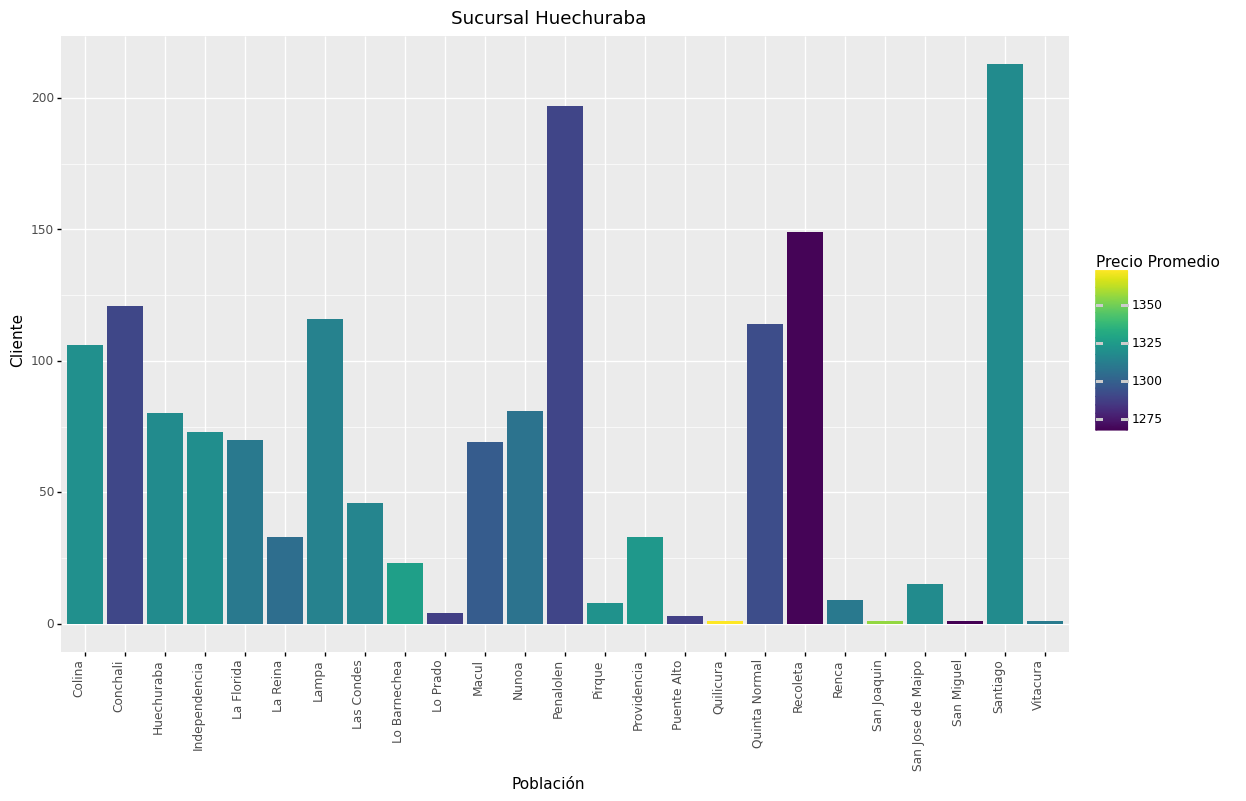

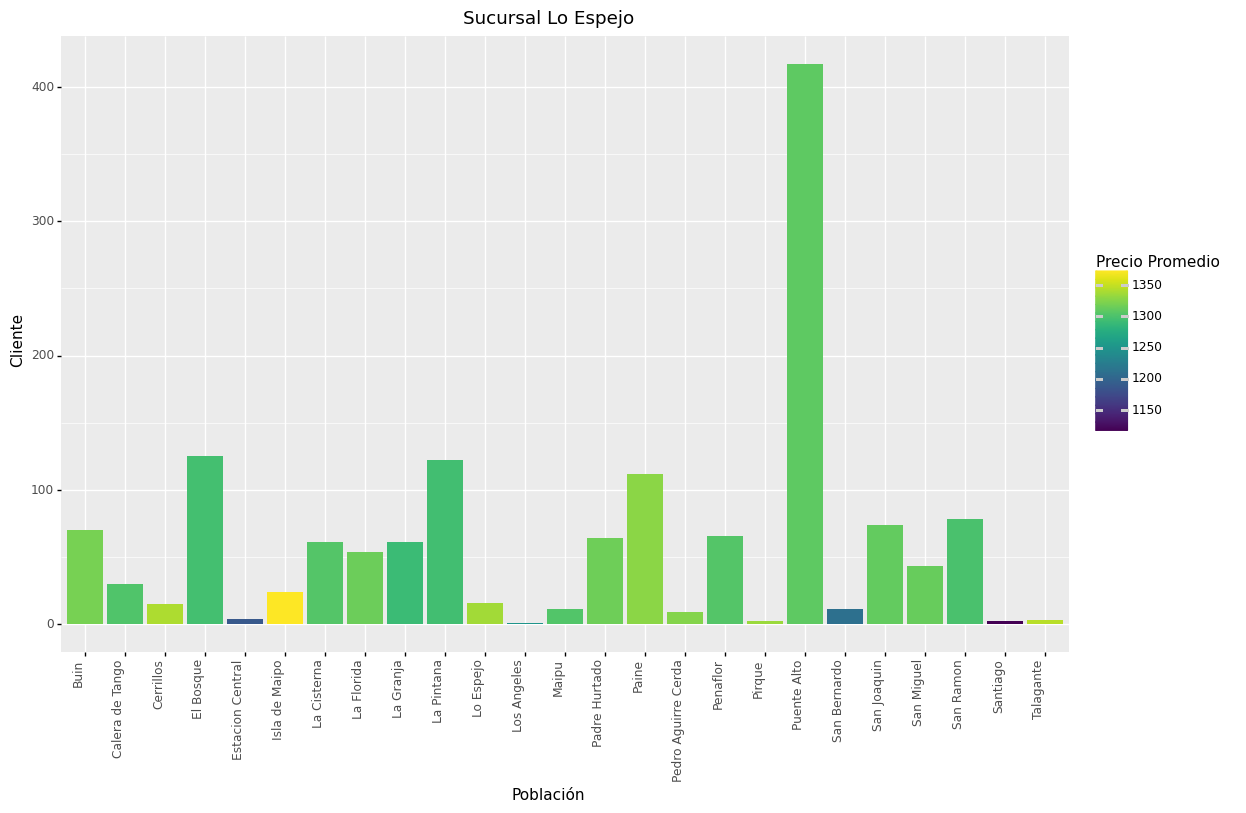

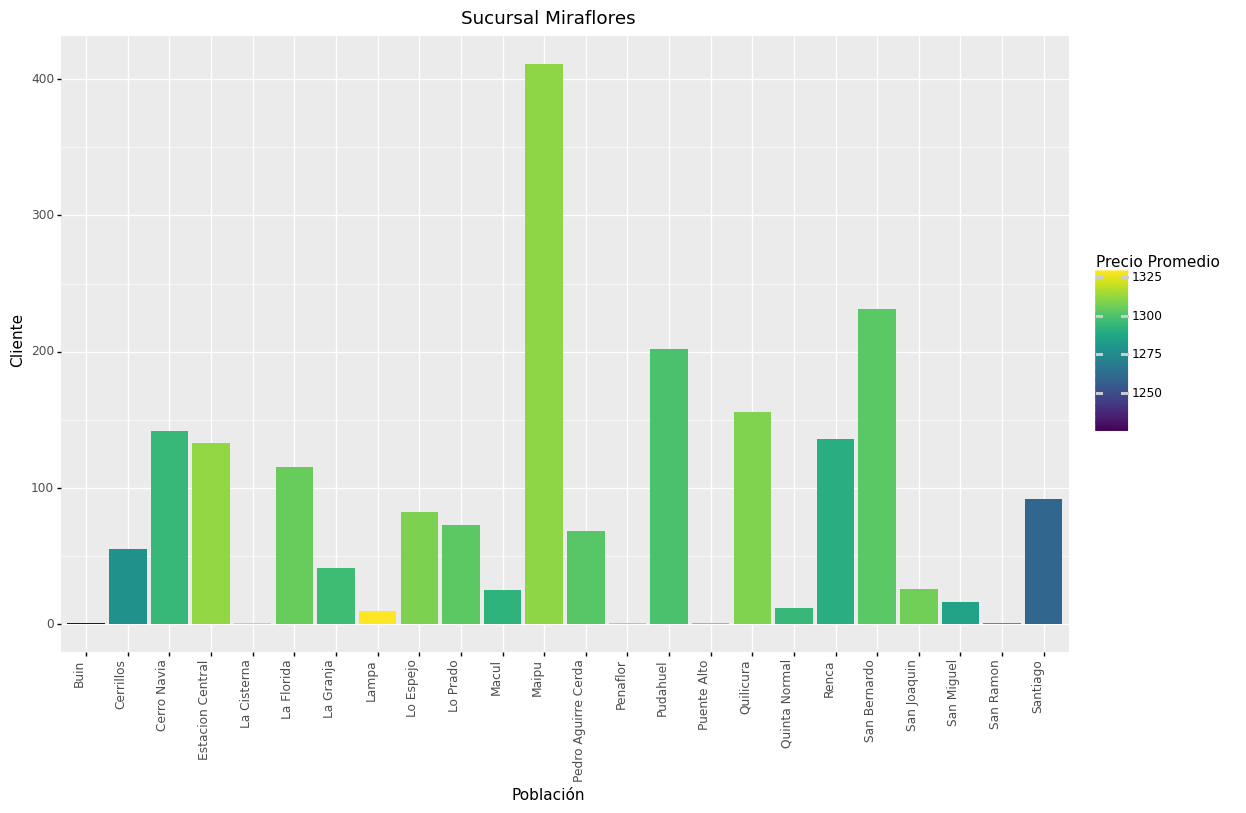

[<ggplot: (87648978996)>, <ggplot: (87648983640)>, <ggplot: (87648988892)>]

In [35]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

list_ggplot=[]
c=0
Colores=['red','green','blue']
for i in df[Color_G].unique():
    print(i)
    df_i=df[df[Color_G]==i].copy()
    df_i[Y_G]=df_i[Y_G].astype('int64')
    
    list_ggplot.append\
    (
        ggplot(
            df_i[df_i[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , fill='Precio Promedio'
               )
        )
        + geom_col()#fill=Colores[c]
        +ggtitle(i)
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)
              )
    )
    c+=1
print(c)
list_ggplot

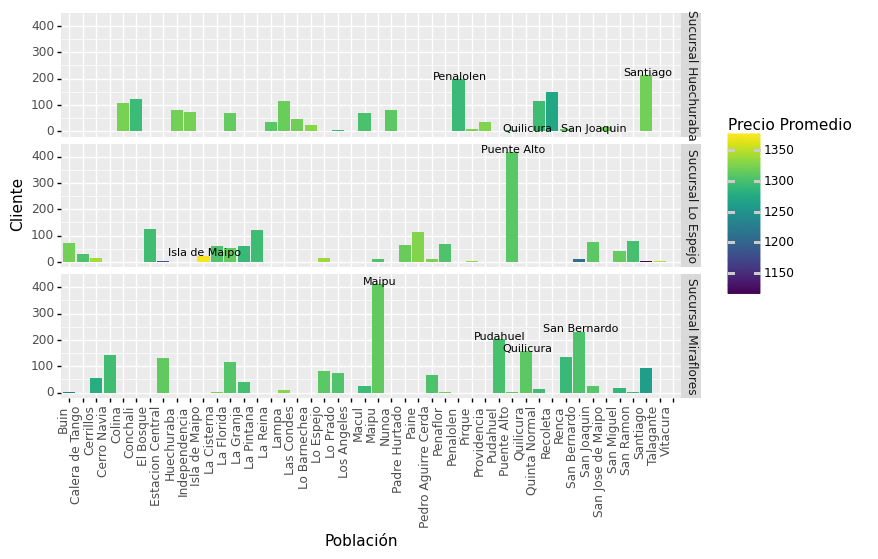

<ggplot: (87650889954)>

In [36]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_col_Prec=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , fill='Precio Promedio'
                ,label=X_G
               )
        )
        +facet_grid('Centro~.')
        + geom_col()#fill=Colores[c]
        #+ggtitle(i)
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
            (df['Precio Promedio']>1350)|#(df['Precio Promedio']<=1250)|
                (df[Y_G]>=150)]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=0.1, nudge_y=10     
                  )
    )
G_col_Prec

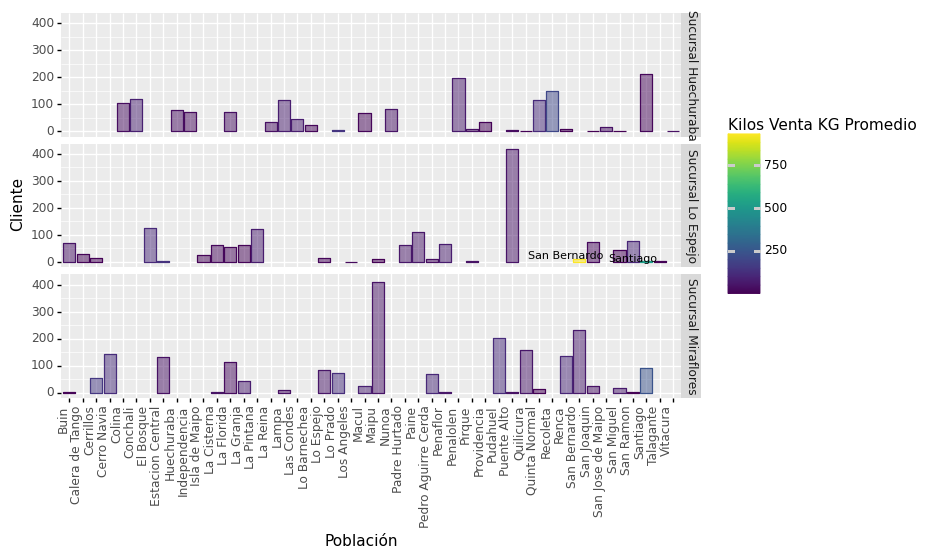

<ggplot: (87658143452)>

In [37]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_col_KG=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , color='Kilos Venta KG Promedio'
                , fill='Kilos Venta KG Promedio'
                ,label=X_G
               )
        )
        +facet_grid('Centro~.')
        + geom_col(alpha=0.5)#fill=Colores[c]
        #+ggtitle(i)
        
# +scale_y_continuous( breaks=range(350,1900,250))


    
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
             (df['Kilos Venta KG Promedio']>500)#|#(df['Precio Promedio']<=1250)|
                #(df[Y_G]>=150)
            ]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=-1, nudge_y=11     
                  )
    )
G_col_KG

##### Puntos 

###### Promedio general 

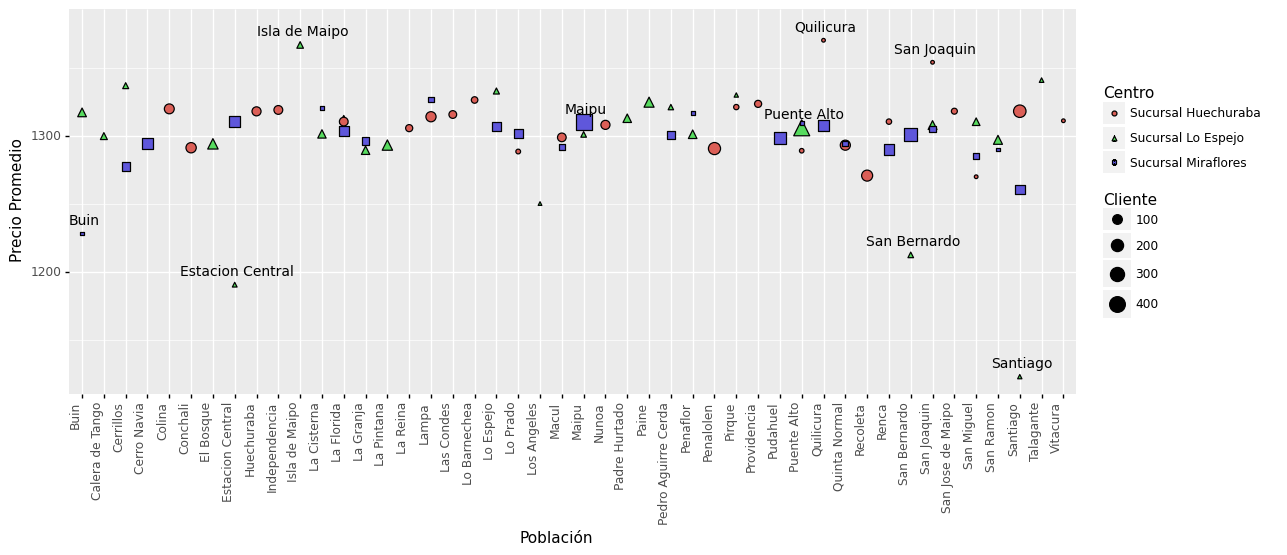

<ggplot: (87658902279)>

In [38]:
#Construye df de la cantidad de clientes que hay en Población/Sucursal

df=Count_Clientes.groupby(Dic_col['Ubicacion']).count().reset_index()

df=pd.merge(
df,df_group, how = 'inner',
)


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Precio Promedio'
Color_G=Dic_col['Ubicacion'][0]
G_size='Cliente'
# 'Kilos Venta KG Promedio'


# Lim_X=2250




G_point_prec=(
        ggplot(
            df, 
            aes(x=X_G, y=Y_G
                , fill=Color_G
               ,label=X_G #Color_G
                ,size= G_size
                ,shape=Color_G
#                 'Kilos Venta KG Promedio'
#                 'Precio Promedio'
           )
        )
        #+ geom_col()
        +geom_point()
        +geom_text(
            df[
            (df[Y_G]>1350)|(df[Y_G]<=1250)|(df[G_size]>=250)]
            ,ha='center', va='center', size=10 ,
            color='black'
#             ,adjust_text=True
            ,nudge_x=0.1, nudge_y=10     
                  )
        
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,5)
              )
        +ggtitle('')
    )
G_point_prec

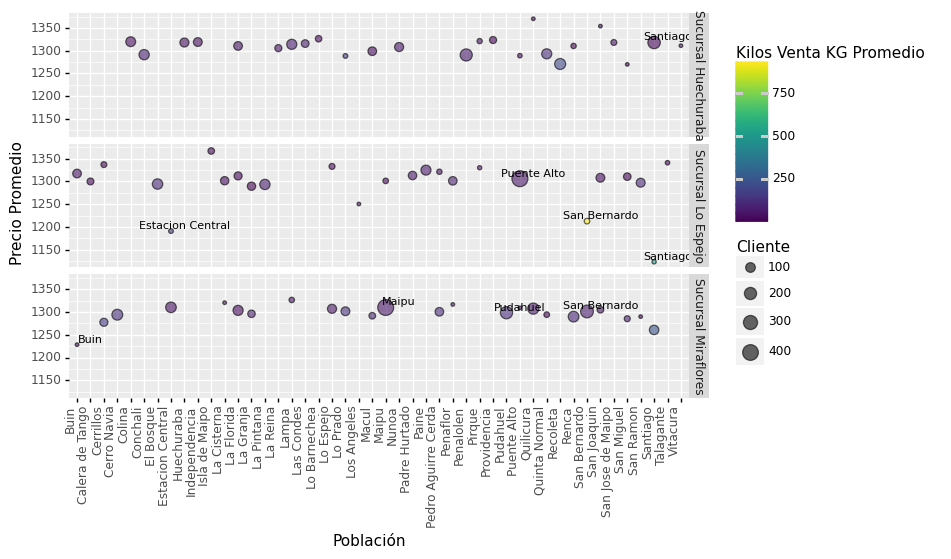

<ggplot: (87650832038)>

In [39]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Precio Promedio'
#'Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_point_KG=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , color='Kilos Venta KG Promedio'
                , fill='Kilos Venta KG Promedio'
                ,label=X_G
                ,size='Cliente'
               )
        )
        +facet_grid('Centro~.')
        + geom_point(alpha=0.6,color='black')#fill=Colores[c]
        #+ggtitle(i)
        
        +scale_y_continuous( breaks=range(800,1900,50))#,limits=(800,1900))


    
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
             (df['Kilos Venta KG Promedio']>500)|(df['Precio Promedio']<=1250)
                |(df['Cliente']>=200)
            ]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=1, nudge_y=12     
                  )
    )
G_point_KG

###  Save


##### Graficos 

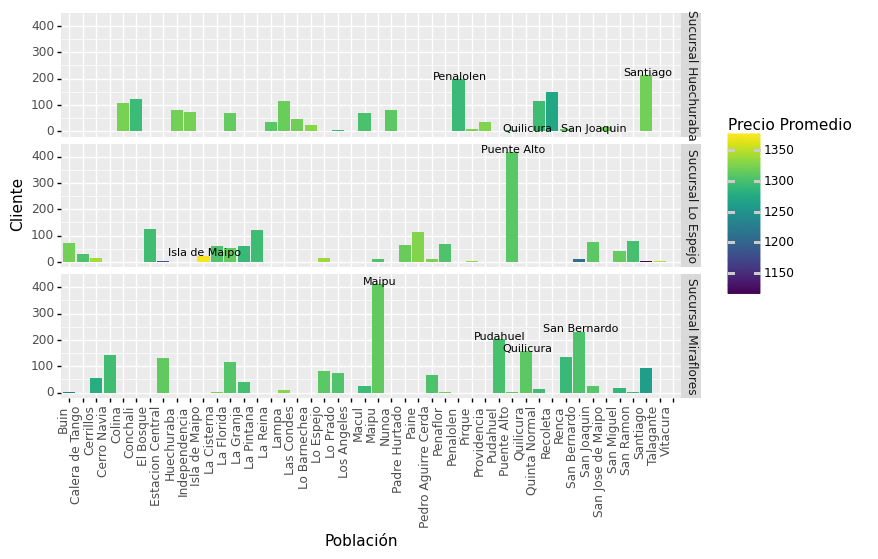

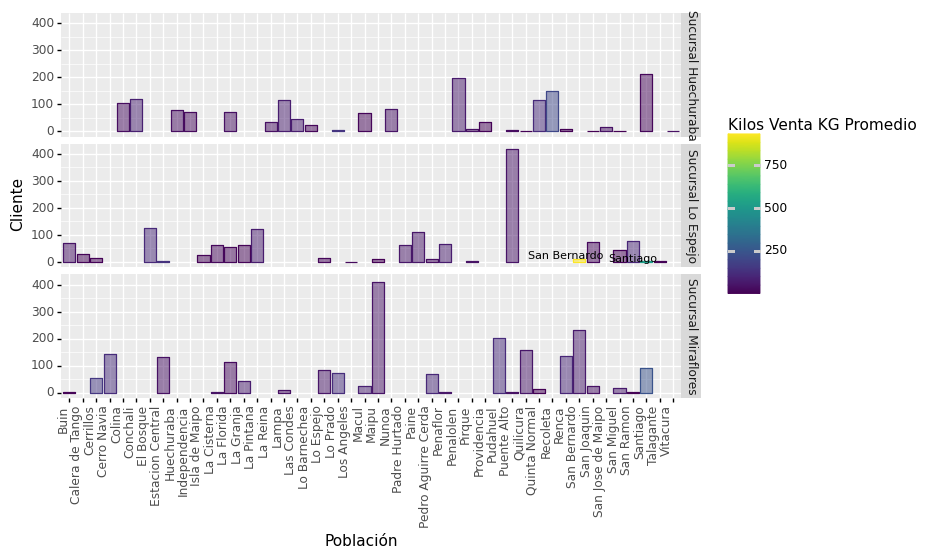

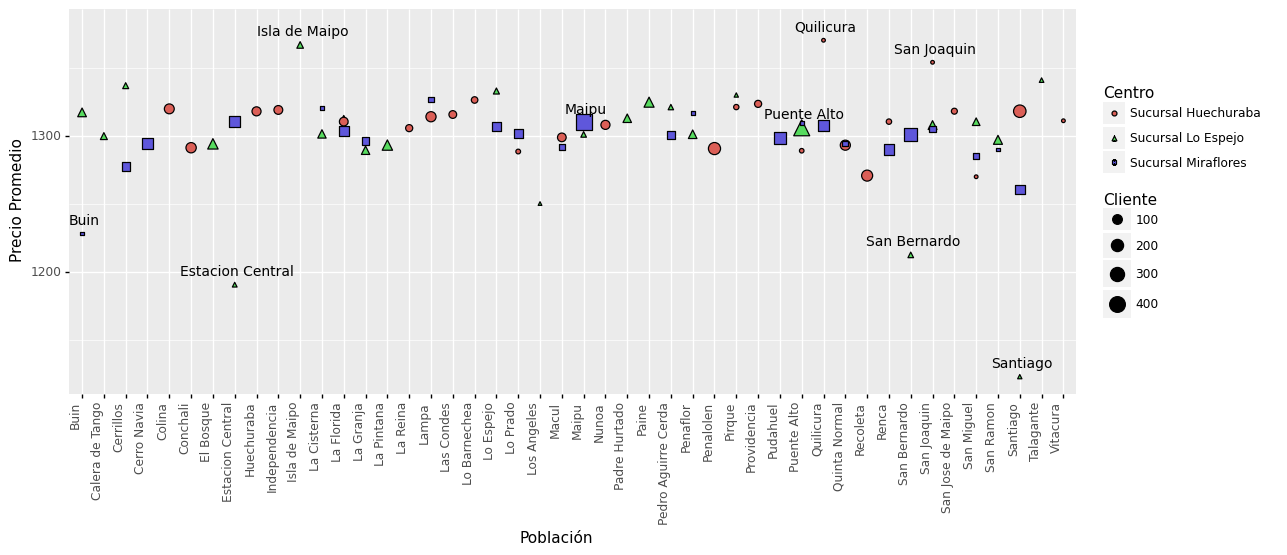

[<ggplot: (87650889954)>, <ggplot: (87658143452)>, <ggplot: (87658902279)>]

In [40]:
[G_col_Prec , G_col_KG , G_point_prec]

##### PNJ SAVE 


```python 
j=0
for i in ['Columna Precio','Columna KG','Puntos Precio']:
    G_Lista=[G_col_Prec , G_col_KG , G_point_prec]
    file_name= 'Ubicación'+i
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\Ubicación"
    
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1
```

##### PDF SAVE 

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
                    [G_col_Prec , G_col_KG , G_point_prec]
                    ,Png_file_direct_Graphic_Canal_Material +"\\Ubicación"+"\\Ubicacion Sobre P y KG"+ ".pdf")
time_convert(time.time()-start_time)
```



file_name='Dispersión Mean(Precios_Volumen)_4_each_Cliente'
ggsave(plot = p,
       filename = file_name, 
       path =Png_file_direct_Graphic_Canal_Material+'\\'+Carpeta
      ,dpi = 300
      )


# Boxplot Cat Client

## Promedio cliente 

#### Data

In [41]:
df=data_i.groupby(['Centro','Cliente']).mean().reset_index().dropna()
df.head()

,Centro,Cliente,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
0,Sucursal Huechuraba,10028999,22.000000,1320.923077,2007.0,62.0
1,Sucursal Huechuraba,10034580,544.695652,1121.057971,2011.0,223.0
2,Sucursal Huechuraba,10044200,22.000000,1396.666667,2020.0,8.0
3,Sucursal Huechuraba,10051077,115.021583,1218.338129,2007.0,226.0
4,Sucursal Huechuraba,10052251,22.076923,1352.307692,2007.0,47.0


#### Grafica 

In [42]:
i=Dic_col['Ubicacion'][0]#'Centro'
j=Dic_col['Ubicacion'][0]#'Centro'
Box_Cat(data_i.groupby([i,'Cliente']).mean().reset_index().dropna()
        ,Y_Graph='Precio',X_G=i,Color_G=j)

NameError: name 'Box_Cat' is not defined

## Facturaciones 

### Fucnión 

###### Pre funcion 

Precio Centro Centro
iguales
df_mean (3, 5)
mean (3, 5) count (3, 3)
Precio Centro Centro


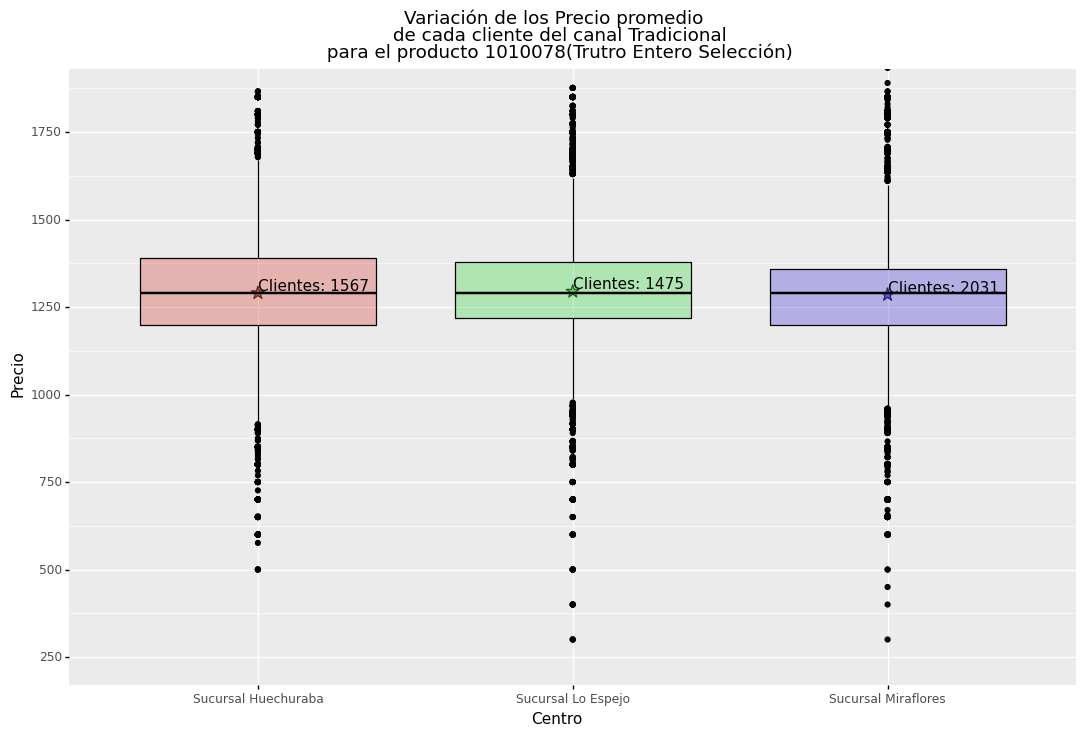

<ggplot: (87707816165)>

In [317]:

df=data_i.copy()
Y_Graph='Precio'
X_G=Dic_col['Ubicacion'][0]
# Color_G=Dic_col['Ubicacion'][1]
Color_G=Dic_col['Ubicacion'][0]

s=data_i['Material (Nombre)'].unique()[0]
print(Y_Graph,X_G,Color_G)


if(X_G==Color_G):
    print('iguales')
    df_mean=df\
    .groupby([X_G]).mean().reset_index()
    print('df_mean',df_mean.shape)
    df_count_C=df[[X_G]+['Cliente']
        ].groupby([X_G]+['Cliente']).count().reset_index().groupby([X_G]).count()\
        .reset_index().rename(columns={'Cliente':'Cantida de Clientes'})
else:
    df_mean=df\
    .groupby([X_G,Color_G]).mean().reset_index()

    df_count_C=df[[X_G,Color_G]+['Cliente']
        ].groupby([X_G,Color_G]+['Cliente']).count().reset_index().groupby([X_G,Color_G]).count()\
        .reset_index().rename(columns={'Cliente':'Cantida de Clientes'})

df_count_C['Clientes']= 'Clientes: ' + df_count_C['Cantida de Clientes'].astype('str')
print('mean',df_mean.shape,
     'count',df_count_C.shape
     )


#merge
#Junto la cantidad de clientes que posee cada Suc/Pobla
df_mean=pd.merge(
    df_mean,
    df_count_C
    , how = 'inner',
    )

print(
Y_Graph#='Precio'
,X_G#=i
,Color_G
)
# Lim_X=2250
# Lim_Y=1900
if(Color_G==X_G):
    Fun_G=(
    ggplot(
        df_mean
        ,aes(
            x= X_G
            ,y= Y_Graph 
            ,color=Color_G
            ,fill=Color_G
#              ,size='Cantida de Clientes'
            
        ))
    + geom_point(df_mean
                 ,shape='*',color='black'
                 ,size=5
                )
                 #,
                 #fill=df['Año'],
                 #)#df['Año'])

    + geom_boxplot(df,color='black',alpha=0.4)

    


    +geom_text(
             label=df_mean['Clientes']#.astype('int64')#Y_Graph
            ,ha='left',color='black',va='bottom'
            ,lineheight=14
            )#hjust=0,vjust=0    


    +coord_cartesian(ylim = [250,1850])
    +scale_y_continuous( breaks=range(250,1850,250))
    #limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    

    +ggtitle('Variación de los ' +Y_Graph + ' promedio \n de cada cliente'
                + ' del canal '+ Tipo_de_Cliente 
                +'\n para el producto '+s)
    +theme(axis_text_x = element_text(hjust=0.5),figure_size=(13,8),legend_position='none')
    )
else:
    Fun_G=(
    ggplot(
        df_mean
        ,aes(
            x= X_G
            ,y= Y_Graph 
            ,color=Color_G
            ,fill=Color_G
#              ,size='Cantida de Clientes'
            
        ))
    + geom_point(df_mean
                 ,shape='*',color='black'
                 ,size=5
                )
                 #,
                 #fill=df['Año'],
                 #)#df['Año'])

    + geom_boxplot(df,color='black',alpha=0.4)

    


    +coord_cartesian(ylim = [250,1850])
    +scale_y_continuous( breaks=range(250,1850,250))
    #limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    

    +ggtitle('Variación de los ' +Y_Graph + '\n de cada cliente'
                + ' del canal '+ Tipo_de_Cliente 
                +'\n para el producto '+s)
    +theme(axis_text_x = element_text(hjust=0.5),figure_size=(13,8))#,legend_position='none')
    )
Fun_G

###### Función 

In [318]:
# del(Y_Graph,X_G,Color_G)
#(i,j)#(df_mean,df_count_C,df,i)

Precio Centro Centro
iguales
df_mean (3, 5)
mean (3, 5) count (3, 3)
Precio Centro Centro


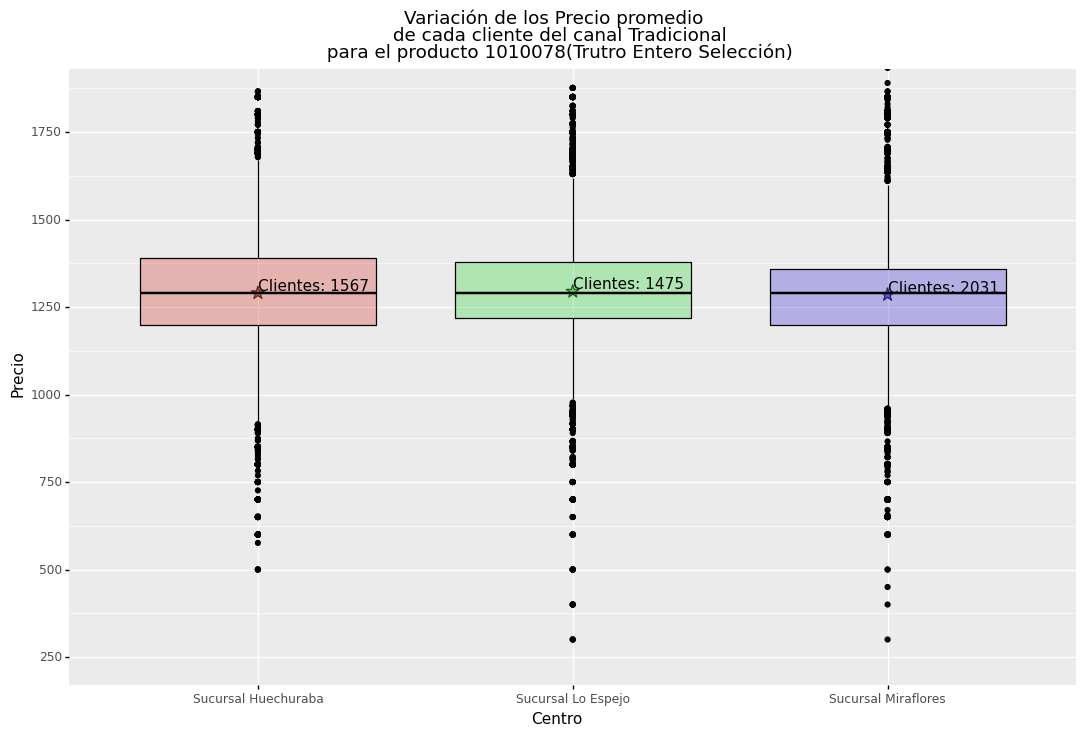

<ggplot: (87703331235)>

In [319]:
def Box_Cat(df,Y_Graph='Precio',X_G=Dic_col['Ubicacion'][0],Color_G=Dic_col['Ubicacion'][0]):
    s=data_i['Material (Nombre)'].unique()[0]
    print(Y_Graph,X_G,Color_G)


    if(X_G==Color_G):
        print('iguales')
        df_mean=df\
        .groupby([X_G]).mean().reset_index()
        print('df_mean',df_mean.shape)
        df_count_C=df[[X_G]+['Cliente']
            ].groupby([X_G]+['Cliente']).count().reset_index().groupby([X_G]).count()\
            .reset_index().rename(columns={'Cliente':'Cantida de Clientes'})
    else:
        df_mean=df\
        .groupby([X_G,Color_G]).mean().reset_index()

        df_count_C=df[[X_G,Color_G]+['Cliente']
            ].groupby([X_G,Color_G]+['Cliente']).count().reset_index().groupby([X_G,Color_G]).count()\
            .reset_index().rename(columns={'Cliente':'Cantida de Clientes'})

    df_count_C['Clientes']= 'Clientes: ' + df_count_C['Cantida de Clientes'].astype('str')
    print('mean',df_mean.shape,
         'count',df_count_C.shape
         )


    #merge
    #Junto la cantidad de clientes que posee cada Suc/Pobla
    df_mean=pd.merge(
        df_mean,
        df_count_C
        , how = 'inner',
        )

    print(
    Y_Graph#='Precio'
    ,X_G#=i
    ,Color_G
    )
    # Lim_X=2250
    # Lim_Y=1900
    #=======================================
    
    
    # Si Se utiliza una sola caracteristica
    
    #=======================================
    if(Color_G==X_G):
        Fun_G=(
        ggplot(
            df_mean
            ,aes(
                x= X_G
                ,y= Y_Graph 
                ,color=Color_G
                ,fill=Color_G
    #              ,size='Cantida de Clientes'

            ))
        + geom_point(df_mean
                     ,shape='*',color='black'
                     ,size=5
                    )
                     #,
                     #fill=df['Año'],
                     #)#df['Año'])

        + geom_boxplot(df,color='black',alpha=0.4)




        +geom_text(
                 label=df_mean['Clientes']#.astype('int64')#Y_Graph
                ,ha='left',color='black',va='bottom'
                ,lineheight=14
                )#hjust=0,vjust=0    


        +coord_cartesian(ylim = [250,1850])
        +scale_y_continuous( breaks=range(250,1850,250))
        #limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    

        +ggtitle('Variación de los ' +Y_Graph + ' promedio \n de cada cliente'
                    + ' del canal '+ Tipo_de_Cliente 
                    +'\n para el producto '+s)
        +theme(axis_text_x = element_text(hjust=0.5),figure_size=(13,8),legend_position='none')
        )
    else:
        Fun_G=(
        ggplot(
            df_mean
            ,aes(
                x= X_G
                ,y= Y_Graph 
                ,color=Color_G
                ,fill=Color_G
    #              ,size='Cantida de Clientes'

            ))
#         + geom_point(df_mean
#                      ,shape='*',color='black'
#                      ,size=5
#                     )
                     #,
                     #fill=df['Año'],
                     #)#df['Año'])

        + geom_boxplot(df,color='black',alpha=0.4)




        +coord_cartesian(ylim = [250,1850])
        +scale_y_continuous( breaks=range(250,1850,250))
        #limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    

        +ggtitle('Variación de los ' +Y_Graph + '\n de cada cliente'
                    + ' del canal '+ Tipo_de_Cliente 
                    +'\n para el producto '+s)
        +theme(axis_text_x = element_text(hjust=0.5),figure_size=(13,8))#,legend_position='none')
        )
    return(Fun_G)

Box_Cat(data_i.copy(), Y_Graph='Precio', X_G='Centro', Color_G='Centro'#'Población')
       )

### Grafica 

#### Precio 

###### Pre 

In [320]:
Dic_col

{'Base': ['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente'],
 'Fecha': ['Día natural', 'Día Semana', 'Semana', 'Mes', 'Año'],
 'Ubicacion': ['Centro', 'Población'],
 'Cliente Categoria': ['Cluster', 'Segmento.1', 'Categoría Cliente'],
 'Cliente Atributos': ['Año Creación',
  'Material Favorito',
  'Frecuencia Historica']}

Precio Cluster Cluster
iguales
df_mean (3, 5)
mean (3, 5) count (3, 3)
Precio Cluster Cluster
Precio Segmento.1 Segmento.1
iguales
df_mean (3, 5)
mean (3, 5) count (3, 3)
Precio Segmento.1 Segmento.1
Precio Categoría Cliente Categoría Cliente
iguales
df_mean (5, 5)
mean (5, 5) count (5, 3)
Precio Categoría Cliente Categoría Cliente


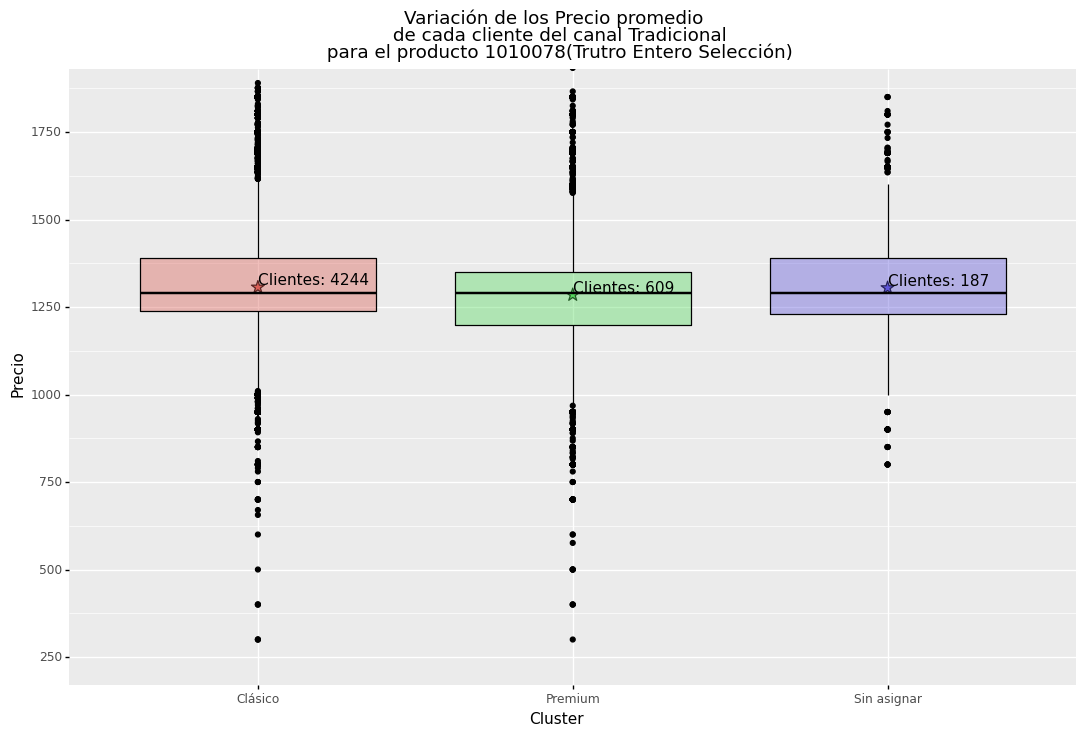

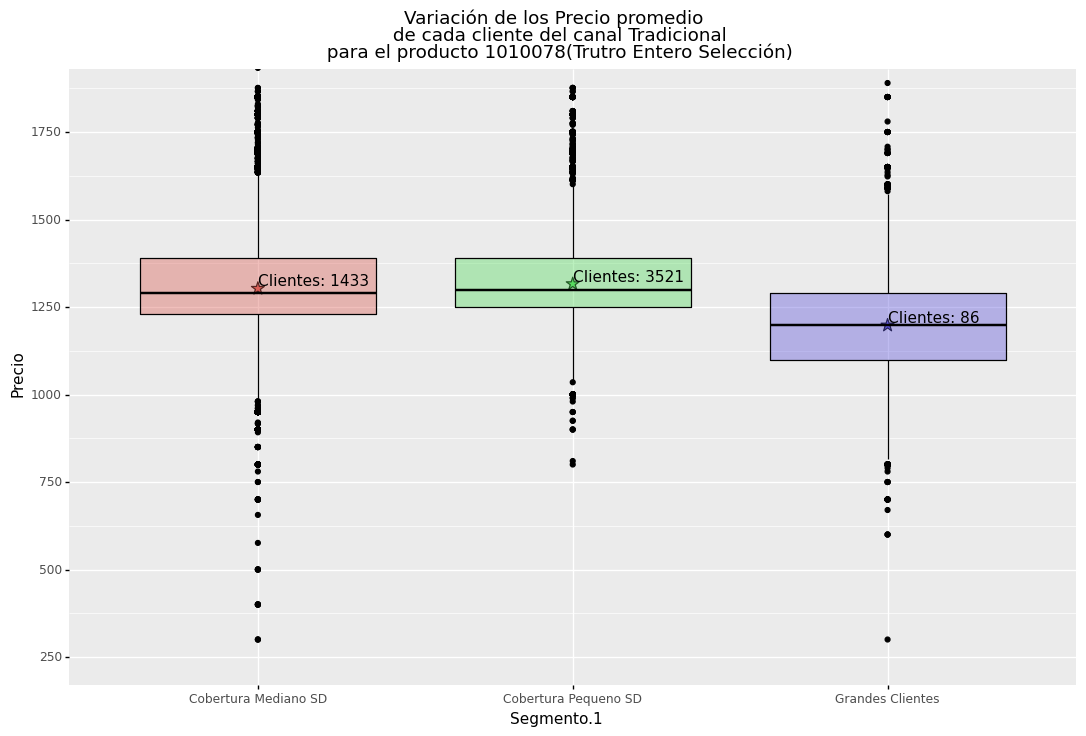

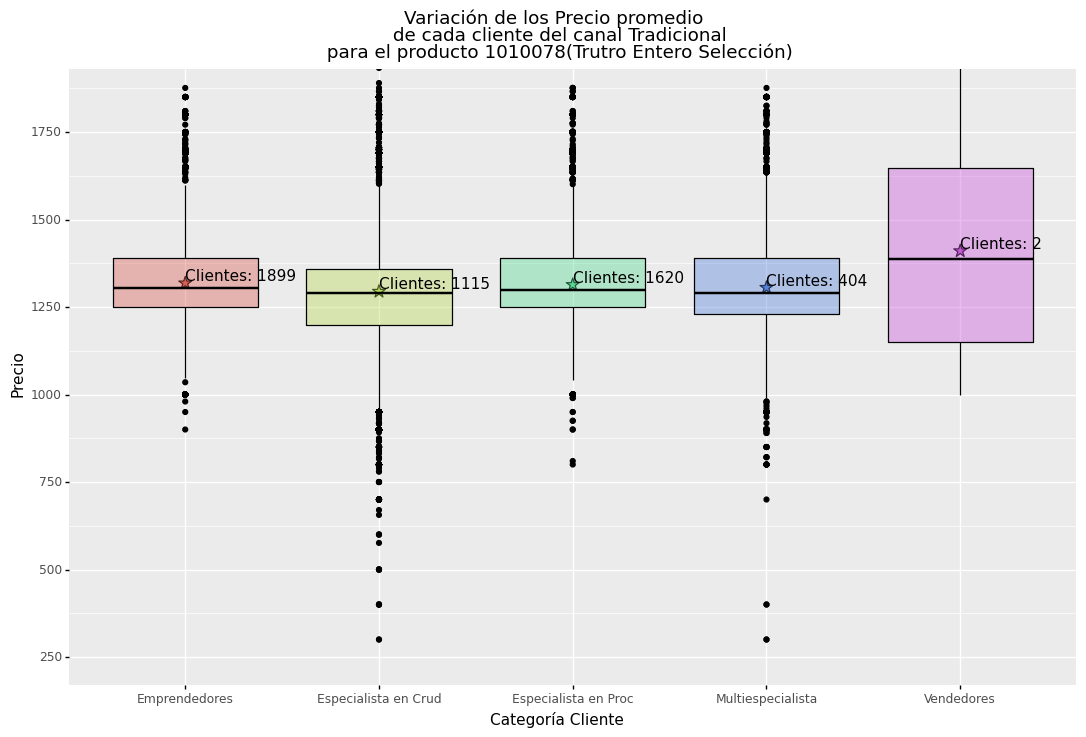

[<ggplot: (87703453968)>, <ggplot: (87703326603)>, <ggplot: (87703371123)>]

In [321]:
[(Box_Cat(data_i[data_i.Año!=2018].copy(), Y_Graph='Precio', X_G=i, Color_G=i))
     for i in Dic_col['Cliente Categoria']]

In [322]:
#DF i definition
df_i=data_i.copy()
df=df.dropna()

#variables
i='Centro'
j='Población'
G_L=[(Box_Cat(df, df_mean=df.groupby([i]).mean().reset_index()
              , Y_Graph='Precio', X_G=i, Color_G=i))
     for i in Dic_col['Cliente Categoria']]

for i in Dic_col['Cliente Categoria']:
    for j in Dic_col['Cliente Categoria']:
        if(i!=j):
            df_mean=df\
            .groupby([i]).mean().reset_index()
            G_L.append(Box_Cat(df, df_mean, Y_Graph='Precio', X_G=j, Color_G=i))

TypeError: Box_Cat() got an unexpected keyword argument 'df_mean'